<a href="https://colab.research.google.com/github/Jeru-John/ML-case-studies/blob/main/BFSI_loan_customer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the Problem:**

**PROJECT OBJECTIVE:**
Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

**Inference from seeing the data:**
1. This is a **`supervised learning`** problem. In supervised learning, the algorithm learns from labeled training data and makes predictions on new, unseen data based on patterns it learned during training.
2. the task involves predicting whether a customer will convert based on the provided dataset, making it a **`classification`** problem. Given that the target variable is binary (convert or not convert), classification algorithms are suitable for this project.
3. Some datas are marked as **`unit is masked`** - This means that the actual values of those attributes are modified or concealed in some way to protect the privacy of the data or sensitive information.
4. It has **7 columns**: ID, Mortgage, Security, FixedDepositAccount, InternetBanking, CreditCard, LoanOnCard

# **Basic Preprocessing:**

**Importing libraries:**

In [15]:
#Standard libraries for data analysis and data visualization:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # helps in data visulatization plot
import seaborn as sns # Enhancing the visual aesthetics of plots

**reading a dataset:**

In [33]:
dataframe = pd.read_csv('/content/BFSI.csv')
print(dataframe.head()) # prints 1st 5 rows
print(dataframe.tail()) # prints last 5 rows

   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
        ID  Mortgage  Security  FixedDepositAccount  InternetBanking  \
4995  4996         0         0                    0                1   
4996  4997        85         0                    0                1   
4997  4998         0         0                    0                0   
4998  4999         0         0                    0                1   
4999  5000         0         0                    0                1 

**Evaluating data structures of the dataset:**

In [17]:
#Evaluating data structures:
print(dataframe.shape); # gives (no_of_rows, no_of_cols)
print(dataframe.size); # gives total no of values
print(dataframe.describe()); # gives count,mean and some details only for numerical values
print(dataframe.dtypes); # gives the datatypes of all cols respectively and the whole datatype of dataset
print(dataframe.info()); # gives no_of_values, null value detail, datatype of all cols

(5000, 7)
35000
                ID     Mortgage     Security  FixedDepositAccount  \
count  5000.000000  5000.000000  5000.000000           5000.00000   
mean   2500.500000    56.498800     0.104400              0.06040   
std    1443.520003   101.713802     0.305809              0.23825   
min       1.000000     0.000000     0.000000              0.00000   
25%    1250.750000     0.000000     0.000000              0.00000   
50%    2500.500000     0.000000     0.000000              0.00000   
75%    3750.250000   101.000000     0.000000              0.00000   
max    5000.000000   635.000000     1.000000              1.00000   

       InternetBanking   CreditCard   LoanOnCard  
count      5000.000000  5000.000000  4980.000000  
mean          0.596800     0.294000     0.096386  
std           0.490589     0.455637     0.295149  
min           0.000000     0.000000     0.000000  
25%           0.000000     0.000000     0.000000  
50%           1.000000     0.000000     0.000000  
75%  

Insights from evaluating the datastructure:

1. it contains 5000 - rows and 7 - columns
2. total no of values = 35000
3. every column contains of only int or float (categorical values)
4. LoanOnCard has 20 null values, which makes it values to 4980

In [34]:
# Checking Null Values
dataframe.isnull().any()

ID                     False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard              True
dtype: bool

As told before `LoanOnCard` has null values.

# **Basic Data cleaning:**

In [52]:
# make a new copy of the dataset:
data_copy = dataframe.copy()

**1. Handling missing values:**

**Imputing:** Filling the missing values in the column `LoanOnCard` with mean

In [46]:
# Calculate the mean excluding missing values
mean_value = data_copy['LoanOnCard'].mean()

# Replace missing values with the mean value
data_copy['LoanOnCard'].fillna(mean_value, inplace=True)

# Check for empty values again
empty_values = data_copy['LoanOnCard'].isnull()
empty_string_indices = data_copy[empty_values].index
print(empty_string_indices)
print(len(empty_string_indices))
print(data_copy['LoanOnCard'].dtypes)

Int64Index([], dtype='int64')
0
float64


In [47]:
# Checking Null Values again
data_copy.isnull().any()

ID                     False
Mortgage               False
Security               False
FixedDepositAccount    False
InternetBanking        False
CreditCard             False
LoanOnCard             False
dtype: bool

**Removing ID column:**

In [53]:
data_copy = data_copy.drop(columns=['ID'])
print(data_copy.head())

   Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0         0         1                    0                0           0   
1         0         1                    0                0           0   
2         0         0                    0                0           0   
3         0         0                    0                0           0   
4         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


# **Data Exploration:**

**Check target variable distribution:**

In [80]:
print(data_copy[['LoanOnCard']].value_counts())

LoanOnCard
0.0           4500
1.0            480
dtype: int64


Insight:  Loans on cards are relatively rare among customers

**Univariate Analysis:**

In [67]:
# List of categorical columns to plot
categorical_cols = ["Security", "FixedDepositAccount", "InternetBanking", "CreditCard", "LoanOnCard"]

In [68]:
# Create a single figure for count plots
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    print(data_copy[col].value_counts())

0    4478
1     522
Name: Security, dtype: int64
0    4698
1     302
Name: FixedDepositAccount, dtype: int64
1    2984
0    2016
Name: InternetBanking, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


<Figure size 1500x600 with 0 Axes>

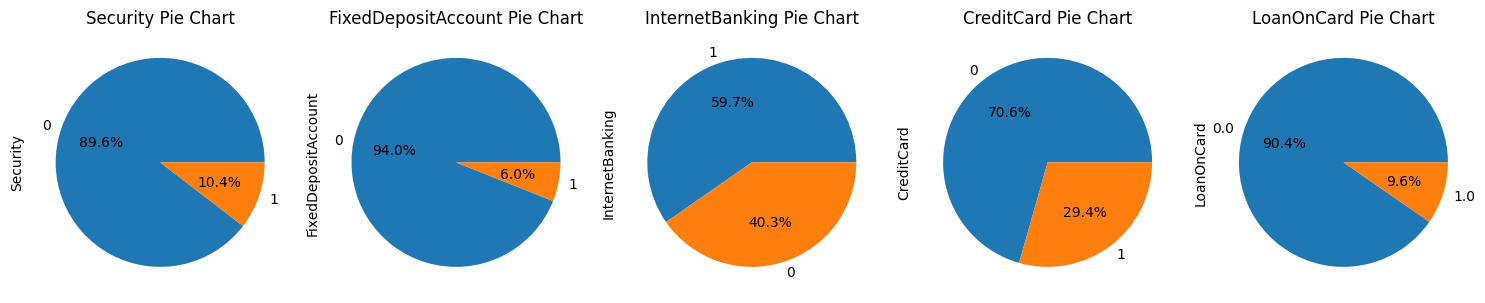

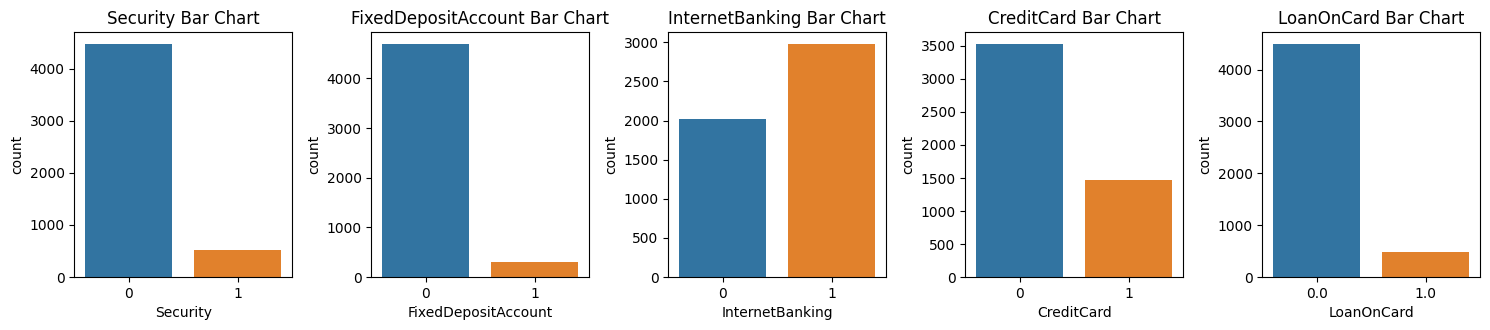

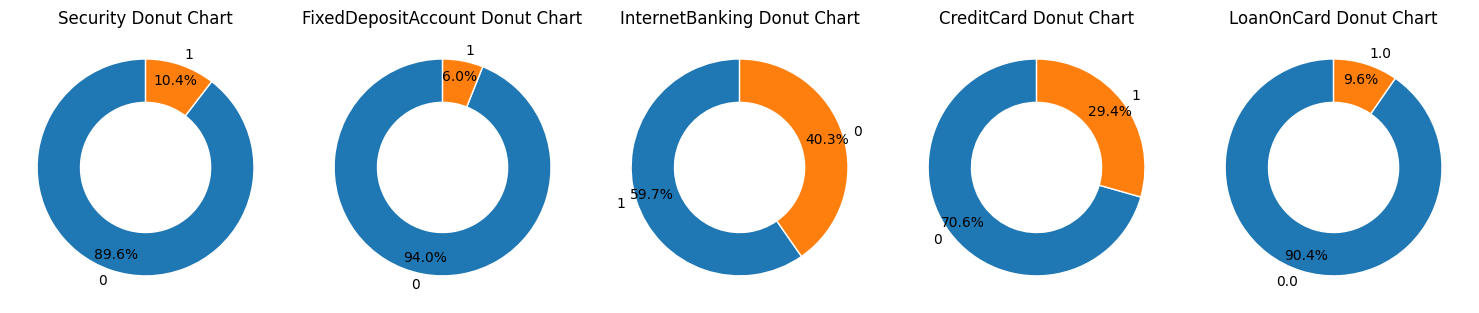

In [70]:
# Create a single figure for pie charts
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i)
    data_copy[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'{col} Pie Chart')
plt.tight_layout()
plt.show()

# Create a single figure for bar charts
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i)
    sns.countplot(x=col, data=data_copy)
    plt.title(f'{col} Bar Chart')
plt.tight_layout()
plt.show()


# Create a single figure for donut charts
plt.figure(figsize=(15, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 5, i)
    counts = data_copy[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85,
            wedgeprops=dict(width=0.4, edgecolor='w'))
    plt.title(f'{col} Donut Chart')
plt.tight_layout()
plt.show()

<ipython-input-79-27ac29b04e01>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True)
<ipython-input-79-27ac29b04e01>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True)
<ipython-input-79-27ac29b04e01>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True)
<ipython-input-79-27ac29b04e01>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_copy[col], shade=True)
<ipython-input-79-27ac29b04e01>:13: FutureWarning: 

`shade` is 

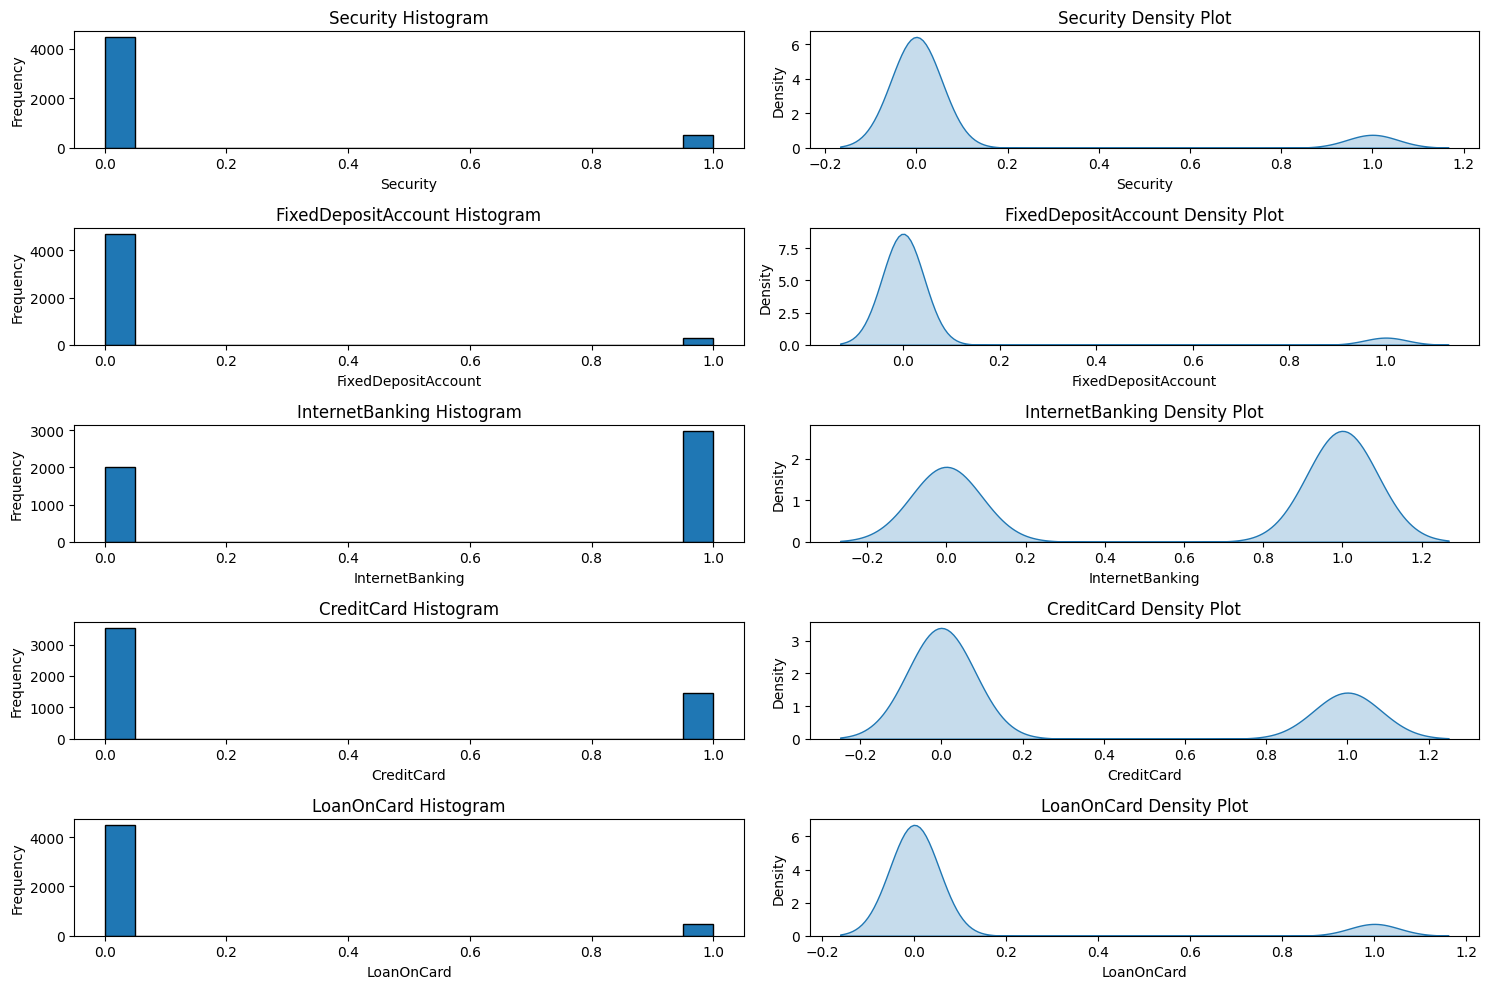

In [79]:
# Create a figure with pairs of histograms and density plots for each categorical column
plt.figure(figsize=(15, 10))
num_cols = len(categorical_cols)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(num_cols, 2, i*2-1)  # Histogram subplot
    plt.hist(data_copy[col], bins=20, edgecolor='black')
    plt.title(f'{col} Histogram')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(num_cols, 2, i*2)  # Density plot subplot
    sns.kdeplot(data_copy[col], shade=True)
    plt.title(f'{col} Density Plot')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Inferences:**

1. Security: Most customers lack security features, with few prioritizing security.
2. Fixed Deposits: Customers rarely have fixed deposit accounts.
3. Internet Banking: Many customers use internet banking, indicating digital engagement.
4. Credit Cards: Credit card usage is common among customers.
5. Loan on Card (Target): Very Few customers have loans on their cards, which could influence loan-related marketing strategies.


**Overall Insights:**

1. The dataset portrays a customer base with varying levels of adoption for different financial services.
2. Internet banking and credit card usage are relatively prevalent, reflecting a digitally engaged customer segment.
3. Opportunities exist to promote security, fixed deposit accounts, and loans on cards based on low adoption.

**Bivariate Analysis:**